In [1]:
from method import *
import numpy as np 
import matplotlib.pyplot as plt  # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300

## ZWM experiment

single photon

In [2]:
psi_in = p1[1]*p2[0]*c[0] #  c-> path for controlling path identity

psi_b_bs = phaseshifter(pathidentity(spdc(beamsplitter(spdc(beamsplitter
        (psi_in, p1, p2), p1, s1, i1), i1, c, t), p2, s2, i2), i1, i2), s2, phi_s) #psi before last beamsplitter
psi_out = beamsplitter(psi_b_bs, s1, s2)
psi_out

g*t*c[0]*i1[0]*i2[1]*p1[0]*p2[0]*s1[0]*s2[1]/2 + g*t*c[0]*i1[0]*i2[1]*p1[0]*p2[0]*s1[1]*s2[0]/2 + g*sqrt(1 - t**2)*c[1]*i1[0]*i2[0]*p1[0]*p2[0]*s1[0]*s2[1]/2 + g*sqrt(1 - t**2)*c[1]*i1[0]*i2[0]*p1[0]*p2[0]*s1[1]*s2[0]/2 + g*exp(I*phi_s)*c[0]*i1[0]*i2[1]*p1[0]*p2[0]*s1[0]*s2[1]/2 - g*exp(I*phi_s)*c[0]*i1[0]*i2[1]*p1[0]*p2[0]*s1[1]*s2[0]/2 + sqrt(2)*c[0]*i1[0]*i2[0]*p1[0]*p2[1]*s1[0]*s2[0]/2 + sqrt(2)*c[0]*i1[0]*i2[0]*p1[1]*p2[0]*s1[0]*s2[0]/2

In [3]:
R_s = rate_fun(psi_out, s1, s2, 'photon_counting')
R_s = new_func(R_s)    
R_s = R_s.rewrite(sp.cos).simplify()
R_s

g**2*(-t*cos(phi_s) + 1)/2

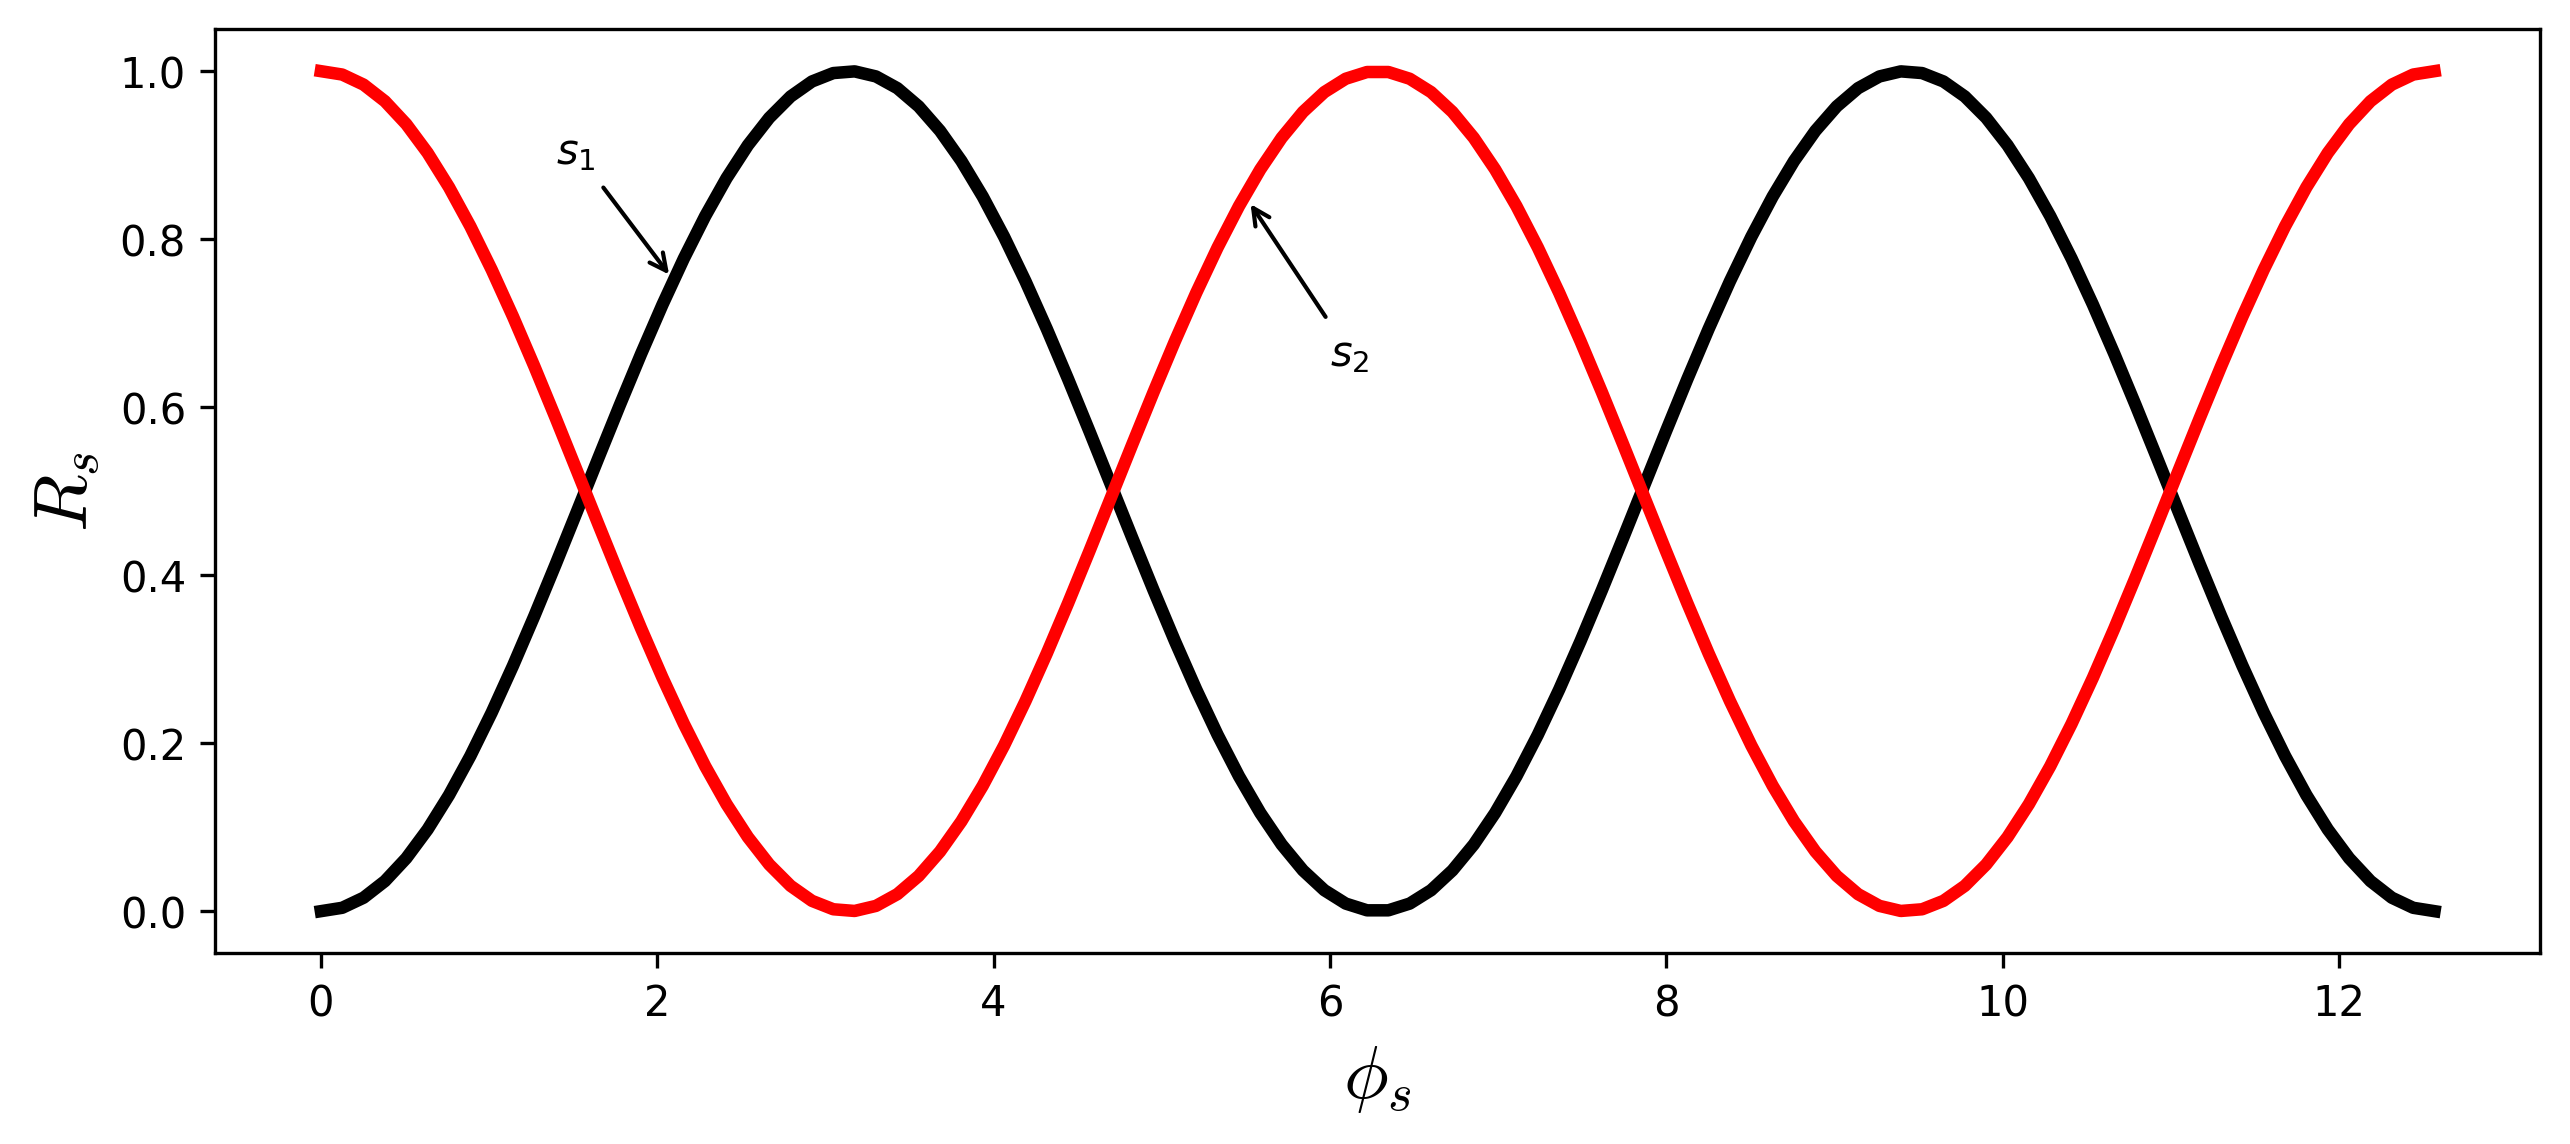

In [4]:
#to plot R_s if t = 1
phi = np.linspace(0, 4*np.pi, 100)
N1 = 1/2*(-np.cos(phi) + 1) 
N2 = 1/2*(np.cos(phi) + 1) 
fig, ax = plt.subplots(ncols = 1,nrows = 1,figsize = (10,4), facecolor = 'w')
ax.plot(phi, N1, color = 'k', lw = 3)
ax.plot(phi, N2, color = 'r', lw = 3)
ax.set_ylabel(r"$R_s$", math_fontfamily = 'cm', fontsize = 18)
ax.set_xlabel(r'$\phi_s$', math_fontfamily = 'cm', fontsize = 18)
ax.annotate(r"$s_2$", xy = (5.5, 0.85), xytext = (6.0, 0.65), arrowprops = dict(arrowstyle = "->"))
ax.annotate(r"$s_1$", xy = (2.1, 0.75), xytext = (1.4, 0.89), arrowprops = dict(arrowstyle = "->"))
plt.show()

In [5]:
#to calcuLate visibility
r_min = R_s.replace(phi_s, 0)
r_max = R_s.replace(phi_s, sp.pi)
v = visibility(r_min, r_max).simplify()
v

t

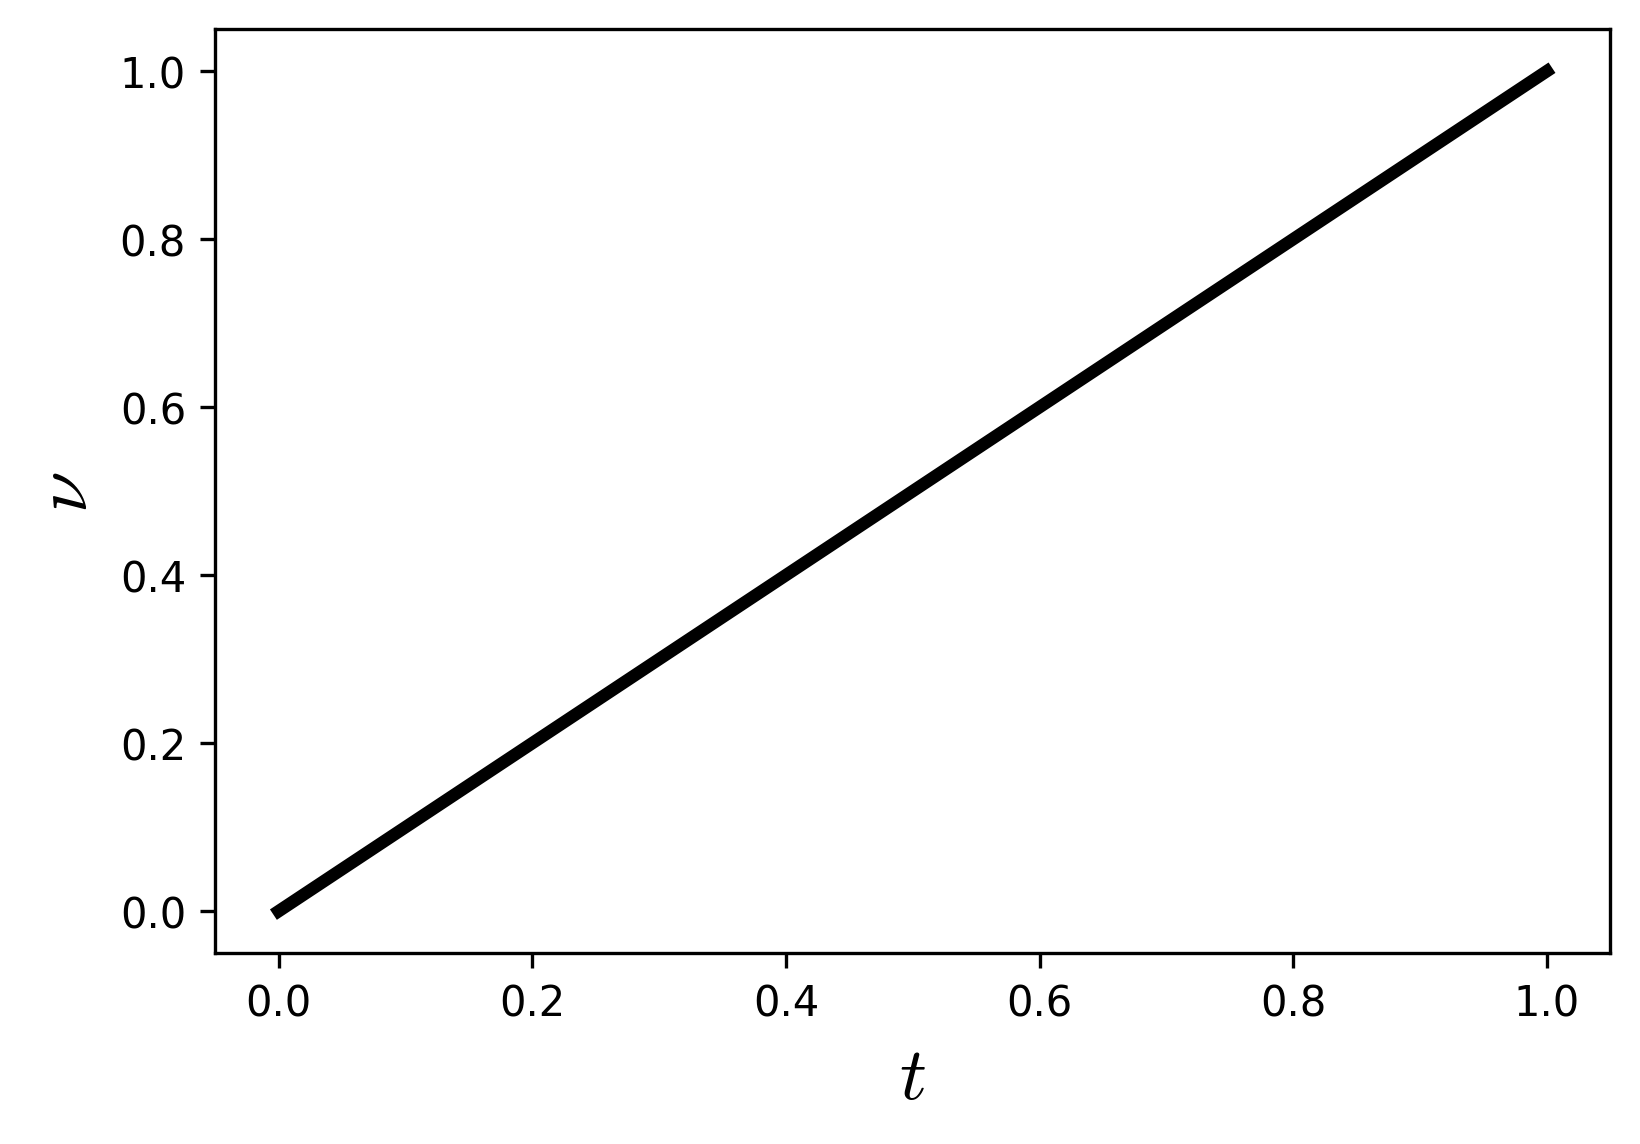

In [6]:
#to plot visibility 
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (6, 4), facecolor = 'w')
t0  = np.linspace(0, 1, 100)
v = t0
ax.plot(t0, v, color = 'k', lw = 3)
ax.set_ylabel(r"$\nu$", math_fontfamily = 'cm', fontsize = 18)
ax.set_xlabel(r'$t$', math_fontfamily = 'cm', fontsize = 18)
plt.show()

In [7]:
#to calcuLate coincidence
C_s = rate_fun(psi_b_bs, s1, s2, 'coincidence')
C_s

0

## NONCLASSICAL CORRELATIONS

coherent state

In [8]:
# b, c ->  paths for controlling path identity
initial_state= p1[alpha/sp.sqrt(3)]*p2[alpha/sp.sqrt(3)]*p3[alpha/sp.sqrt(3)]*b[0]*c[0] 
initial_state

b[0]*c[0]*p1[sqrt(3)*alpha/3]*p2[sqrt(3)*alpha/3]*p3[sqrt(3)*alpha/3]

In [9]:
psi1 = spdc(spdc(beamsplitter(spdc(initial_state, p1, s1, i1, 'coherent state'),
        i1, b, 1), p2, s2, i2, 'coherent state'), p3, s3, i3, 'coherent state') 

psi2 = spdc(beamsplitter(spdc(spdc(initial_state, p1, s1, i1, 'coherent state'),
        p2, s2, i2, 'coherent state'), i2, c, 1), p3, s3, i3, 'coherent state') 

In [10]:
#five different projections
v1 = tritterB(pathidentity(psi2, i2, i3), s1, s2, s3)
v2 = beamsplitter(pathidentity(psi1, i1, i2), s1, s2, coeff)
v3 = pathidentity(psi1, i1, i2)
v4 = pathidentity(psi2, i2, i3)
v5 = beamsplitter(pathidentity(psi2, i2, i3), s2, s3, coeff)

In [11]:
pro1 = rate_fun(v2, s3, i2, 'joint_probability')
pro2 = rate_fun(v3, i2, s3, 'joint_probability')
pro3 = rate_fun(v4, s3, i1, 'joint_probability')
pro4 = rate_fun(v5, i1, i3, 'joint_probability')
pro5 = rate_fun(v1, i3, s3, 'joint_probability')

In [12]:
k = pro1 + pro2 + pro3 + pro4 + pro5
#k = k.replace(sp.conjugate(sp.sqrt(1-t**2)), sp.sqrt(1-t**2))
k.collect(alpha*g)

13*alpha**8*g**8/81 + 14*alpha**6*g**6/27 + 104*alpha**4*g**4/81 + 19*alpha**2*g**2/9